In [2]:
import pandas as pd
import numpy as np
import math
import sys

##load libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from matplotlib.colors import ListedColormap

#
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
#

#
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    

In [3]:
data = pd.read_csv("dataolah.csv") 

In [3]:
data.head()

,jumlah_kotak_indukan,tipe_kotak_indukan,banyak_indukan/kg,pembenihan_banyak_media_ternak/wadah_dan_/kg,pembesaran_banyak_media_ternak/wadah_dan_/kg,jumlah_kotak_UK,tipe_kotak_UK,hasil_panen,Suhu
0,2,2,1.0,3,3,4,1,6.675604,30
1,3,1,1.0,2,2,6,1,12.480800,30
2,6,0,1.0,3,3,15,0,29.225789,32
3,10,0,1.0,2,2,14,0,32.768020,30
4,6,0,1.0,4,4,15,0,28.904311,33


In [4]:
nData = len(data)
nData
n = len(data.columns)
n

9

In [5]:
#Filtering data berdasarkan suhu
def get_suhu(suhu) :
    s = __builtins__.list()
    for i in range(nData) :
        if(data['Suhu'].iloc[i] == suhu) :
            s.append(data.iloc[i])
    return s

In [6]:
data_suhu = pd.DataFrame(get_suhu(30))
data_suhu.head()

,jumlah_kotak_indukan,tipe_kotak_indukan,banyak_indukan/kg,pembenihan_banyak_media_ternak/wadah_dan_/kg,pembesaran_banyak_media_ternak/wadah_dan_/kg,jumlah_kotak_UK,tipe_kotak_UK,hasil_panen,Suhu
0,2.0,2.0,1.00,3.0,3.0,4.0,1.0,6.675604,30.0
1,3.0,1.0,1.00,2.0,2.0,6.0,1.0,12.480800,30.0
3,10.0,0.0,1.00,2.0,2.0,14.0,0.0,32.768020,30.0
5,8.0,0.0,18.50,3.0,3.0,1.0,0.0,17.078869,30.0
7,9.0,1.0,0.85,5.0,5.0,2.0,0.0,16.730671,30.0


In [9]:
data_suhu['jumlah_kotak_indukan'] = data_suhu['jumlah_kotak_indukan'].astype('int')
data_suhu['tipe_kotak_indukan'] = data_suhu['tipe_kotak_indukan'].astype('int')
data_suhu['jumlah_kotak_UK'] = data_suhu['jumlah_kotak_UK'].astype('int')
data_suhu['tipe_kotak_UK'] = data_suhu['tipe_kotak_UK'].astype('int')
data_suhu['Suhu'] = data_suhu['Suhu'].astype('int')

In [11]:
data_suhu.head()

,jumlah_kotak_indukan,tipe_kotak_indukan,banyak_indukan/kg,pembenihan_banyak_media_ternak/wadah_dan_/kg,pembesaran_banyak_media_ternak/wadah_dan_/kg,jumlah_kotak_UK,tipe_kotak_UK,hasil_panen,Suhu
0,2,2,1.00,3.0,3.0,4,1,6.675604,30
1,3,1,1.00,2.0,2.0,6,1,12.480800,30
3,10,0,1.00,2.0,2.0,14,0,32.768020,30
5,8,0,18.50,3.0,3.0,1,0,17.078869,30
7,9,1,0.85,5.0,5.0,2,0,16.730671,30


In [10]:
data_suhu.isnull().sum()

jumlah_kotak_indukan                            0
tipe_kotak_indukan                              0
banyak_indukan/kg                               0
pembenihan_banyak_media_ternak/wadah_dan_/kg    0
pembesaran_banyak_media_ternak/wadah_dan_/kg    0
jumlah_kotak_UK                                 0
tipe_kotak_UK                                   0
hasil_panen                                     0
Suhu                                            0
dtype: int64

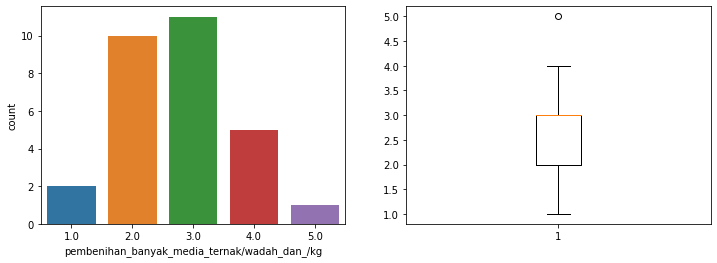

In [14]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(data_suhu['pembenihan_banyak_media_ternak/wadah_dan_/kg'])
f.add_subplot(1,2,2)
plt.boxplot(data_suhu['pembenihan_banyak_media_ternak/wadah_dan_/kg'])
plt.show()

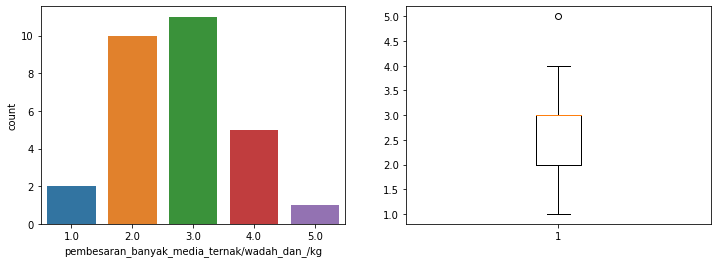

In [15]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(data_suhu['pembesaran_banyak_media_ternak/wadah_dan_/kg'])
f.add_subplot(1,2,2)
plt.boxplot(data_suhu['pembesaran_banyak_media_ternak/wadah_dan_/kg'])
plt.show()

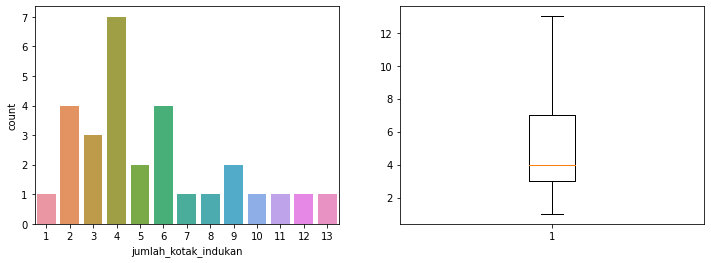

In [17]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(data_suhu['jumlah_kotak_indukan'])
f.add_subplot(1,2,2)
plt.boxplot(data_suhu['jumlah_kotak_indukan'])
plt.show()

In [18]:
hp = data_suhu["hasil_panen"]
hp.head()

0     6.675604
1    12.480800
3    32.768020
5    17.078869
7    16.730671
Name: hasil_panen, dtype: float64

In [242]:
hp.max()

43.79521843

In [19]:
def get_suhu_max() :
    for i in range(len(data_suhu)) :
        if(data_suhu["hasil_panen"].iloc[i] == hp.max()):
            return data_suhu.iloc[i]

In [20]:
pd.DataFrame(get_suhu_max())

,16
jumlah_kotak_indukan,12.000000
tipe_kotak_indukan,0.000000
banyak_indukan/kg,1.000000
pembenihan_banyak_media_ternak/wadah_dan_/kg,2.000000
pembesaran_banyak_media_ternak/wadah_dan_/kg,2.000000
jumlah_kotak_UK,22.000000
tipe_kotak_UK,0.000000
hasil_panen,43.795218
Suhu,30.000000


In [21]:
rasio = pd.read_csv("datarasio.csv")
rasio.head()

,Tanggal Pakan,air,kosentrat,rasio,Suhu,Hari Ke :
0,4/1/2021,0.50,0.2,5:2,25,1
1,4/2/2021,0.40,0.3,4:3,27,2
2,4/3/2021,0.60,0.1,6:1,28,3
3,4/4/2021,0.80,0.3,8:3,25,4
4,4/5/2021,0.38,0.2,19:10,27,5


In [22]:
def get_rasio_by_day(hari) :
    for i in range(len(rasio)) :
        if(rasio["Hari Ke :"].iloc[i] == hari) :
            return rasio.iloc[i]

In [23]:
data_by_day = pd.DataFrame(get_rasio_by_day(2))
dt_transpose = data_by_day.transpose()
dt_transpose

,Tanggal Pakan,air,kosentrat,rasio,Suhu,Hari Ke :
1,4/2/2021,0.4,0.3,4:3,27,2


In [24]:
def get_rasio_by_suhu(suhu) :
    for i in range(len(rasio)) :
        if(rasio["Suhu"].iloc[i] == suhu) :
            return rasio.iloc[i]

In [25]:
data_by_suhu = pd.DataFrame(get_rasio_by_suhu(25))
dt_suhu_transpose = data_by_suhu.transpose()
dt_suhu_transpose

,Tanggal Pakan,air,kosentrat,rasio,Suhu,Hari Ke :
0,4/1/2021,0.5,0.2,5:2,25,1


In [45]:
data_pembenihan = data.drop(['pembesaran_banyak_media_ternak/wadah_dan_/kg','jumlah_kotak_UK','tipe_kotak_UK'], axis=1)

In [49]:
data_pembesaran = data.drop(['pembenihan_banyak_media_ternak/wadah_dan_/kg','tipe_kotak_indukan','jumlah_kotak_indukan'], axis=1)

In [47]:
data_pembenihan.head()

,jumlah_kotak_indukan,tipe_kotak_indukan,banyak_indukan/kg,pembenihan_banyak_media_ternak/wadah_dan_/kg,hasil_panen,Suhu
0,2,2,1.0,3,6.675604,30
1,3,1,1.0,2,12.480800,30
2,6,0,1.0,3,29.225789,32
3,10,0,1.0,2,32.768020,30
4,6,0,1.0,4,28.904311,33


In [50]:
data_pembesaran.head()

,banyak_indukan/kg,pembesaran_banyak_media_ternak/wadah_dan_/kg,jumlah_kotak_UK,tipe_kotak_UK,hasil_panen,Suhu
0,1.0,3,4,1,6.675604,30
1,1.0,2,6,1,12.480800,30
2,1.0,3,15,0,29.225789,32
3,1.0,2,14,0,32.768020,30
4,1.0,4,15,0,28.904311,33


In [61]:
data_pembenihan.corr().style.background_gradient().set_precision(2)

,jumlah_kotak_indukan,tipe_kotak_indukan,banyak_indukan/kg,pembenihan_banyak_media_ternak/wadah_dan_/kg,hasil_panen,Suhu
jumlah_kotak_indukan,1.00,-0.38,0.14,0.16,0.80,0.04
tipe_kotak_indukan,-0.38,1.00,-0.18,-0.12,-0.70,-0.24
banyak_indukan/kg,0.14,-0.18,1.00,0.01,-0.05,-0.04
pembenihan_banyak_media_ternak/wadah_dan_/kg,0.16,-0.12,0.01,1.00,0.05,-0.13
hasil_panen,0.80,-0.70,-0.05,0.05,1.00,0.24
Suhu,0.04,-0.24,-0.04,-0.13,0.24,1.00


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   jumlah_kotak_indukan                          38 non-null     int64  
 1   tipe_kotak_indukan                            38 non-null     int64  
 2   banyak_indukan/kg                             38 non-null     float64
 3   pembenihan_banyak_media_ternak/wadah_dan_/kg  38 non-null     int64  
 4   pembesaran_banyak_media_ternak/wadah_dan_/kg  38 non-null     int64  
 5   jumlah_kotak_UK                               38 non-null     int64  
 6   tipe_kotak_UK                                 38 non-null     int64  
 7   hasil_panen                                   38 non-null     float64
 8   Suhu                                          38 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 2.8 KB


In [93]:
X = data_pembenihan.drop(['pembenihan_banyak_media_ternak/wadah_dan_/kg'],axis=1)
Y = data_pembenihan['pembenihan_banyak_media_ternak/wadah_dan_/kg']

In [105]:
X_pembenihan.head()
Y_pembenihan.head()

0    3
1    2
2    3
3    2
4    4
Name: pembenihan_banyak_media_ternak/wadah_dan_/kg, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split

xben_train, xben_test, yben_train, yben_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [96]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xben_train, yben_train)
pred = reg.predict(xben_test)
pred

array([3.09128477, 2.97355241, 3.36376991, 3.33093466, 2.89042027,
       3.00475107, 2.92344322, 2.59502759, 3.22882545, 3.14233938])

In [97]:
reg.score(xben_test, yben_test)

-0.2456128151540009

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return mean_squared_error(y_true,y_pred)**0.5

In [100]:
rmse(yben_test,pred)

1.093521057203674

In [101]:
data.describe()

,jumlah_kotak_indukan,tipe_kotak_indukan,banyak_indukan/kg,pembenihan_banyak_media_ternak/wadah_dan_/kg,pembesaran_banyak_media_ternak/wadah_dan_/kg,jumlah_kotak_UK,tipe_kotak_UK,hasil_panen,Suhu
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,5.605263,0.710526,1.384211,2.947368,2.947368,9.947368,0.578947,21.092805,30.342105
std,2.795164,0.802290,2.855273,0.984951,0.984951,5.830708,0.826310,10.199291,1.320858
min,1.000000,0.000000,0.500000,1.000000,1.000000,1.000000,0.000000,3.795798,27.000000
25%,4.000000,0.000000,0.850000,2.000000,2.000000,6.000000,0.000000,14.078791,30.000000
50%,6.000000,0.500000,1.000000,3.000000,3.000000,10.500000,0.000000,22.171016,30.000000
75%,6.000000,1.000000,1.000000,4.000000,4.000000,15.000000,1.000000,28.864395,30.000000
max,13.000000,2.000000,18.500000,5.000000,5.000000,22.000000,3.000000,43.795218,35.000000


In [113]:
submission = pd.DataFrame({'suhu': xben_test['Suhu'],'jumlah_kotak_indukan': xben_test['jumlah_kotak_indukan'],'tipe_kotak_indukan' : xben_test['tipe_kotak_indukan'], 'hasil_panen': xben_test['hasil_panen'],'Banyak media pembenihan' : pred})

In [114]:
submission

,suhu,jumlah_kotak_indukan,tipe_kotak_indukan,hasil_panen,Banyak media pembenihan
22,33,6,0,29.611133,3.091285
29,35,6,0,30.735231,2.973552
16,30,12,0,43.795218,3.363770
15,28,6,0,28.037825,3.330935
11,30,3,1,12.480800,2.890420
20,30,3,0,24.857651,3.004751
26,30,9,1,30.026138,2.923443
10,30,4,2,7.838961,2.595028
25,30,6,0,28.808512,3.228825
2,32,6,0,29.225789,3.142339


In [107]:
Xbes = data_pembesaran.drop(['pembesaran_banyak_media_ternak/wadah_dan_/kg'],axis=1)
Ybes = data_pembesaran['pembesaran_banyak_media_ternak/wadah_dan_/kg']

In [116]:
Xbes.head()

,banyak_indukan/kg,jumlah_kotak_UK,tipe_kotak_UK,hasil_panen,Suhu
0,1.0,4,1,6.675604,30
1,1.0,6,1,12.480800,30
2,1.0,15,0,29.225789,32
3,1.0,14,0,32.768020,30
4,1.0,15,0,28.904311,33


In [108]:
from sklearn.model_selection import train_test_split

xbes_train, xbes_test, ybes_train, ybes_test = train_test_split(Xbes, Ybes, test_size=0.25, random_state=0)

In [109]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xbes_train, ybes_train)
predb = reg.predict(xbes_test)
predb

array([3.06220951, 3.090503  , 3.34537805, 3.09665265, 2.76933708,
       2.61269105, 3.21092894, 2.48378699, 3.09489561, 3.06308804])

In [112]:
rmse(ybes_test,predb)

1.0294384225751212

In [117]:
submissionbes = pd.DataFrame({'suhu': xbes_test['Suhu'],'jumlah_kotak_UK': xbes_test['jumlah_kotak_UK'],'tipe_kotak_UK' : xbes_test['tipe_kotak_UK'], 'hasil_panen': xbes_test['hasil_panen'],'Banyak media pembesaran' : predb})

In [118]:
submissionbes

,suhu,jumlah_kotak_UK,tipe_kotak_UK,hasil_panen,Banyak media pembesaran
22,33,15,0,29.611133,3.062210
29,35,15,0,30.735231,3.090503
16,30,22,0,43.795218,3.345378
15,28,15,0,28.037825,3.096653
11,30,6,1,12.480800,2.769337
20,30,16,0,24.857651,2.612691
26,30,15,0,30.026138,3.210929
10,30,2,3,7.838961,2.483787
25,30,15,0,28.808512,3.094896
2,32,15,0,29.225789,3.063088
